In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset('penguins')

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.describe

<bound method NDFrame.describe of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [24]:
!pip install ydata-profiling
profile = ProfileReport(df, title="Penguins Dataset Profiling Report", explorative=True)
profile.to_file("penguins_profile_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 18345.78it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
df.shape

(344, 7)

In [9]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [11]:
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns
bool_cols = df.select_dtypes(include="bool").columns
dt_cols = df.select_dtypes(include="datetime").columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))
print("Boolean columns:", list(bool_cols))
print("Datetime columns:", list(dt_cols))

Numeric columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Categorical columns: ['species', 'island', 'sex']
Boolean columns: []
Datetime columns: []


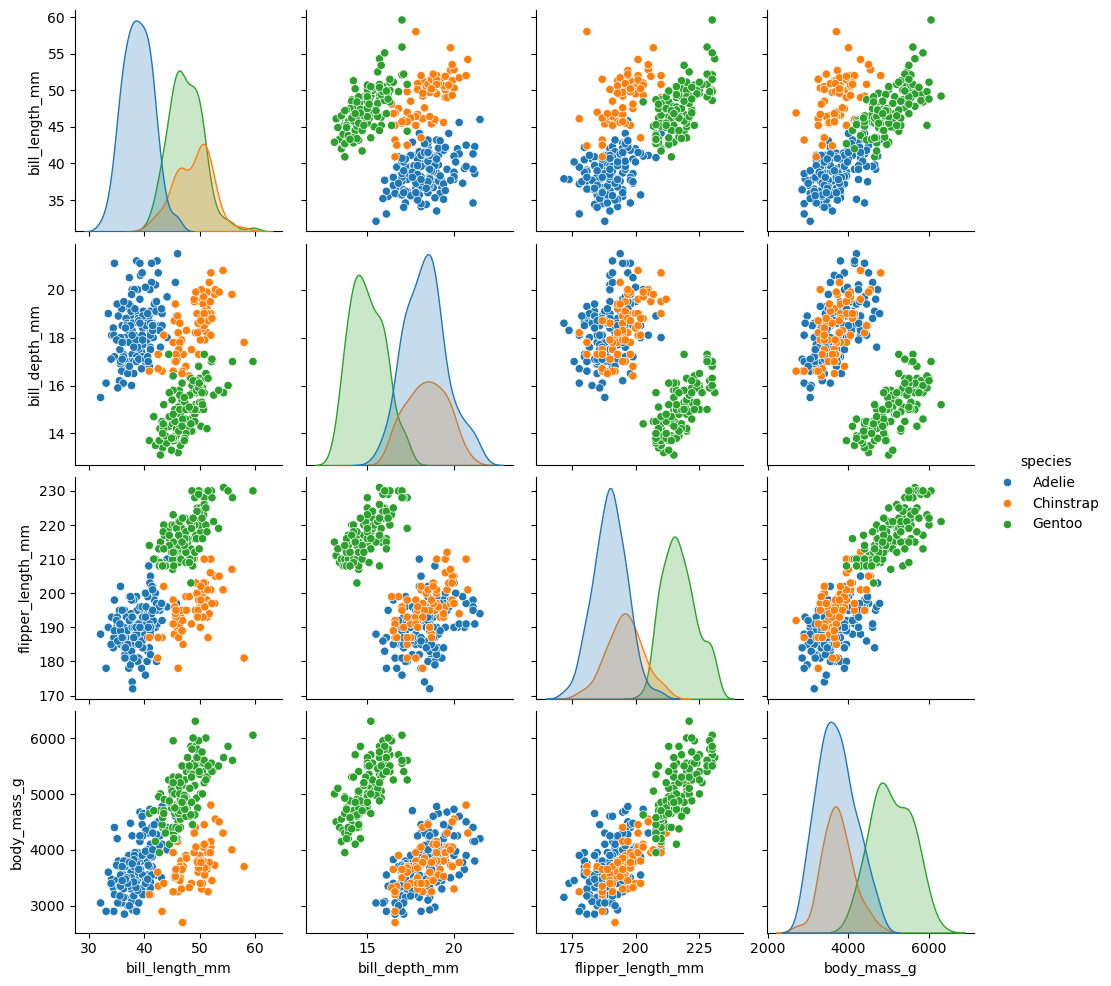

In [12]:
sns.pairplot(df , hue = "species")
plt.show()

In [14]:
df = df.dropna()
X =df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]  
y = df['body_mass_g'] 

X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2 ,random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.7980758349105358
Mean Absolute Error: 289.6890163588326
Mean Squared Error: 127200.47246077773


In [15]:
df = df.dropna()
df = pd.get_dummies(df , columns=['sex' , 'species'] , drop_first=True)
X = df.drop('body_mass_g', axis=1)
y = df['body_mass_g']

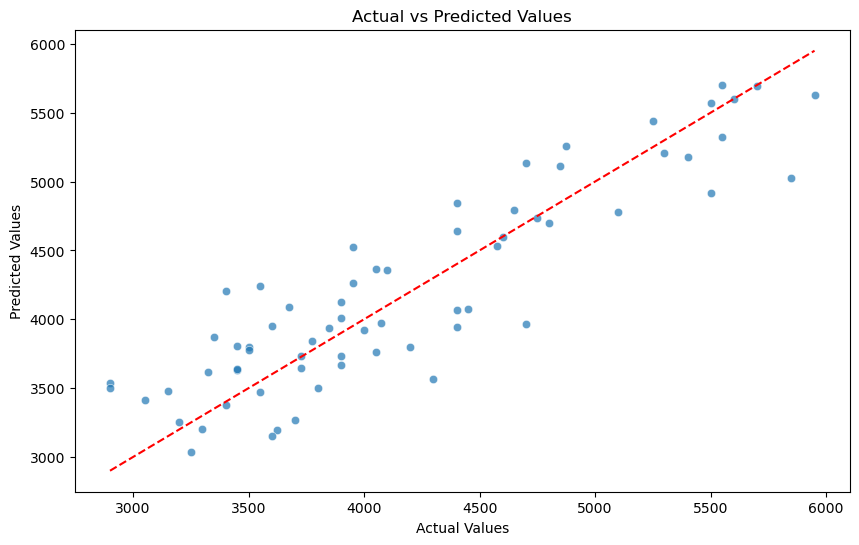

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test , y = y_pred , alpha = 0.7)
plt.plot([y_test.min(), y_test.max()] , [y_test.min(), y_test.max()] , color = 'red' , linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [22]:
corr = df.corr(numeric_only = True)
print(corr)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
sex_Male                 0.344078       0.372673           0.255169   
species_Chinstrap        0.449098       0.323505          -0.186175   
species_Gentoo           0.488256      -0.822293           0.866854   

                   body_mass_g  sex_Male  species_Chinstrap  species_Gentoo  
bill_length_mm        0.589451  0.344078           0.449098        0.488256  
bill_depth_mm        -0.472016  0.372673           0.323505       -0.822293  
flipper_length_mm     0.872979  0.255169          -0.186175        0.866854  
body_mass_g           1.000000  0.424987          -0.298622        0.821178  
sex_Male              0.424987  1.000000 

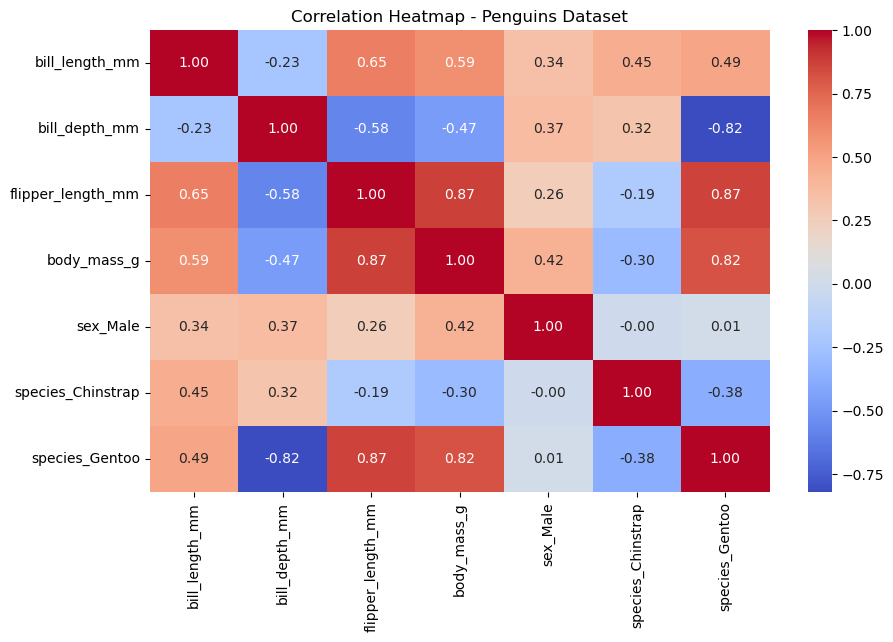

In [26]:
plt.figure(figsize = (10,6))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , fmt = '.2f')
plt.title("Correlation Heatmap - Penguins Dataset")
plt.show()

In [38]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             333 non-null    object 
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex_Male           333 non-null    bool   
 6   species_Chinstrap  333 non-null    bool   
 7   species_Gentoo     333 non-null    bool   
dtypes: bool(3), float64(4), object(1)
memory usage: 24.7+ KB
